<a href="https://colab.research.google.com/github/Sukyeong02/23-2-XAI/blob/main/Lecture_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

f = open('Fish.csv', 'r')
data = csv.reader(f)

header = next(data)

bream_weight = []
bream_length = []

smelt_weight = []
smelt_length = []

for row in data:
    if row[0] == 'Bream':
        bream_weight.append(float(row[1]))
        bream_length.append(float(row[3]))
    elif row [0] == 'Smelt':
        smelt_weight.append(float(row[1]))
        smelt_length.append(float(row[3]))

f.close()

fish_weight = bream_weight + smelt_weight
fish_length = bream_length + smelt_length

print('fish_weight =', fish_weight)
print('fish_length =', fish_length)

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [ ]:
import numpy as np

x = np.column_stack((fish_length, fish_weight))
print(x[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
y = np.concatenate((np.ones(35), np.zeros(14)))
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(36, 2) (13, 2)
(36,) (13,)


In [ ]:
print(y_test)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


위의 결과에서 보면 샘플링 편향 발생

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state = 42)

print(y_test)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn.score(x_test, y_test)

1.0

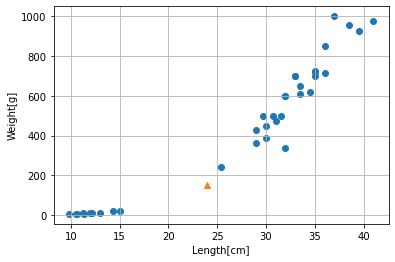

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(24,150, marker='^')
plt.xlabel('Length[cm]')
plt.ylabel('Weight[g]')
plt.grid(True)
plt.show()

In [ ]:
kn.predict([[25,150]])

array([0.])

In [ ]:
distances, indexes = kn.kneighbors([[25,150]])

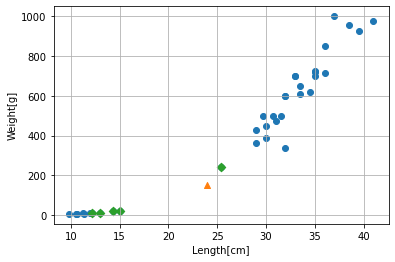

In [ ]:
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(24,150, marker='^')
plt.scatter(x_train[indexes,0], x_train[indexes,1], marker='D')
plt.xlabel('Length[cm]')
plt.ylabel('Weight[g]')
plt.grid(True)
plt.show()

In [ ]:
print(x_train[indexes,:])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(y_train[indexes])

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [ ]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
x_train_scaled = (x_train-mean) / std

### 전처리 데이터로 모델 학습시키기

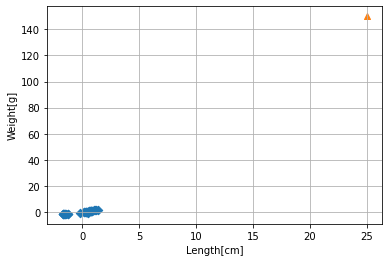

In [ ]:
plt.figure()
plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1], marker='D')
plt.scatter(25,150, marker='^')
plt.xlabel('Length[cm]')
plt.ylabel('Weight[g]')
plt.grid(True)
plt.show()

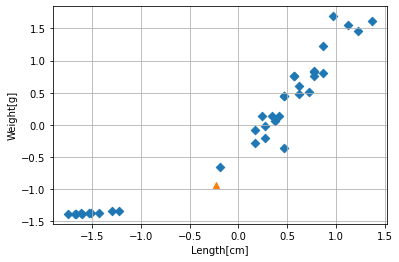

In [ ]:
new = ([25, 150] - mean) / std

plt.figure()
plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1], marker='D')
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('Length[cm]')
plt.ylabel('Weight[g]')
plt.grid(True)
plt.show()

In [ ]:
kn.fit(x_train_scaled, y_train)
x_test_scaled = (x_test - mean) / std
kn.score(x_test_scaled, y_test)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


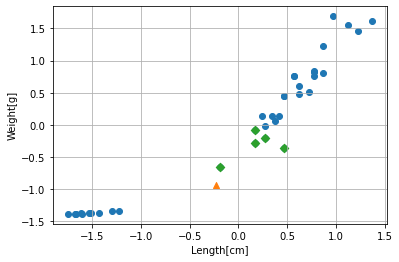

In [ ]:
distances, indexes = kn.kneighbors([new])

plt.figure()
plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(x_train_scaled[indexes,0], x_train_scaled[indexes,1], marker='D')
plt.xlabel('Length[cm]')
plt.ylabel('Weight[g]')
plt.grid(True)
plt.show()